# استدعاء جميع مستلزمات المشروع

## استدعاء المكاتب اللازمة للمشروع
يتم استدعاء مكتبة Pandas التي تتعامل مع ملفات CSV ليتم معالجة قاعدة بيانات الافلام

In [1]:
import pandas as pd

## استدعاء قاعدة بيانات الافلام
يتم استدعاء ملف الافلام movies.csv وارفاقه مع ملفات الكود، ليتم معالجتها

In [2]:
movies=pd.read_csv('movies.csv', usecols=['movieId','title'])
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


## استدعاء قاعدة بيانات تقييم الافلام
يتم استدعاء ملف تقييم الافلام ratings.csv وارفاقه مع ملفات الكود، ليتم معالجتها

In [3]:
ratings=pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# معالجة البيانات

## دمج الجدولين معاً
يتم دمج جدول الافلام والتقييمات بالاعتماد على movieId (علاقة ربط) ليتم عرض الجدول كما في الاسفل

In [4]:
movies_merged=movies.merge(ratings, on='movieId') # علاقة ربط الجدولين بالاعتماد على movieId
movies_merged.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),1,4.0,964982703
1,1,Toy Story (1995),5,4.0,847434962
2,1,Toy Story (1995),7,4.5,1106635946
3,1,Toy Story (1995),15,2.5,1510577970
4,1,Toy Story (1995),17,4.5,1305696483


## حساب معدل التقييمات لكل فلم
يتم حساب معدل تقييم كل فلم على اساس عدد التقييمات لكل فلم وحساب المعدل mean وخزن المعادل بعمود جديد اسمه AVG Rating

In [5]:
movies_average_rating=movies_merged.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'AVG Rating'})
movies_average_rating.head()

,title,AVG Rating
0,Gena the Crocodile (1969),5.0
1,True Stories (1986),5.0
2,Cosmic Scrat-tastrophe (2015),5.0
3,Love and Pigeons (1985),5.0
4,Red Sorghum (Hong gao liang) (1987),5.0


## حساب عدد التقييمات لكل فلم
يتم حساب عدد التقييمات من خلال عمود rating ليتم حساب count لكل فلم وخزن عدد التقييمات لكل فلم في عمود جديد اسمه Rating Count

In [6]:
movies_rating_count=movies_merged.groupby('title')['rating'].count().reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='title')
movies_rating_count_avg

,title,Rating Count,AVG Rating
0,'71 (2014),1,4.000000
1,'Hellboy': The Seeds of Creation (2004),1,4.000000
2,'Round Midnight (1986),2,3.500000
3,'Salem's Lot (2004),1,5.000000
4,'Til There Was You (1997),2,4.000000
...,...,...,...
9714,eXistenZ (1999),22,3.863636
9715,xXx (2002),24,2.770833
9716,xXx: State of the Union (2005),5,2.000000
9717,¡Three Amigos! (1986),26,3.134615


# معانية نتائج التقييمات للافلام

## استدعاء المكاتب اللازم لمعاينة النتائج للتقييم

In [7]:
#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

## عرض المخطط لمعاينة نتائج التقييم
يتم عرض مخطط Seaborn وتغيير لون الخلفية الى اللون الداكن
ثم عرض شكل بحجم (12، 4)
يتم اعتماد قيم Rating Count عدد التقييمات لكل فلم ليتم عرضها في الشكل ادناه

Text(0, 0.5, 'Ratings Count')

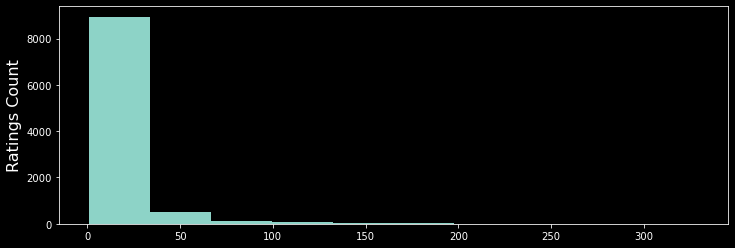

In [8]:
plt.style.use('dark_background')
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Rating Count'])
plt.ylabel('Ratings Count', fontsize=16)

In [9]:
rating_with_RatingCount = movies_merged.merge(movies_rating_count)
rating_with_RatingCount.head()

,movieId,title,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),1,4.0,964982703,215
1,1,Toy Story (1995),5,4.0,847434962,215
2,1,Toy Story (1995),7,4.5,1106635946,215
3,1,Toy Story (1995),15,2.5,1510577970,215
4,1,Toy Story (1995),17,4.5,1305696483,215


In [10]:
movie_features_df=rating_with_RatingCount.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Creating kNN Model

In [11]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

In [12]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)
movie_features_df.shape

(9719, 610)

In [13]:
movie_name = 'sea'

In [14]:
# query_index = np.random.choice(movie_features_df.shape[0])
query_index = movies_rating_count_avg[movies_rating_count_avg['title'].str.contains(movie_name)].title.index[0]
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
print('The Search Movie is: ', movie_features_df.index[query_index])

The Search Movie is:  Earthsea (Legend of Earthsea) (2004)


In [15]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Earthsea (Legend of Earthsea) (2004):

1: FairyTale: A True Story (1997), with distance of 0.0:
2: Hunt For Gollum, The (2009), with distance of 0.0:
3: Last Legion, The (2007), with distance of 0.0:
4: Cirque du Freak: The Vampire's Assistant (2009), with distance of 0.0:
5: Animal Farm (1954), with distance of 0.0:
